In [1]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctl


In [2]:
#função de Transferencia
# G(s) = 2.5/s^2+2s+5
num = np.array([2.5])
den = np.array([1,2,5])
G_s = ctl.tf(num,den)
print(G_s)


     2.5
-------------
s^2 + 2 s + 5



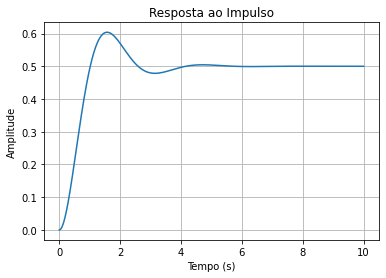

In [3]:
#resposta ao impulso
t = np.linspace (0,10,1000) #vetor de tempo
t1,y1 =ctl.step(G_s,t)
#plot da resposta ao impulso
plt.plot(y1,t1)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Impulso")
plt.grid()
plt.show()

polos:  [-1.+2.j -1.-2.j]
zeros :  []


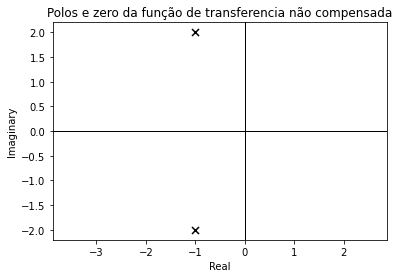

_____Eigenvalue______ Damping___ Frequency_
        -1        +2j     0.4472      2.236
        -1        -2j     0.4472      2.236


In [4]:
#polos da tf
print("polos: ",ctl.pole(G_s))
# Zeros da tf
print("zeros : ",ctl.zero(G_s))
ctl.pzmap(G_s,title="Polos e zero da função de transferencia não compensada")
plt.show()
#wn (array) – frequencia natual para cada polo do sistema
#zeta (array) – Ganho associado a cada polo do sistema
#poles (array) – lista polos do sistema
wn1 , zeta1, poles1 = ctl.damp(G_s, doprint=True)

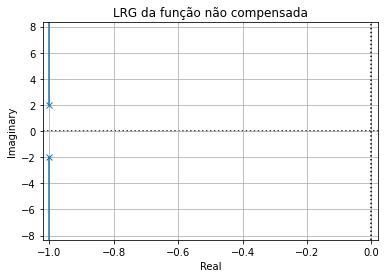

In [5]:
#Raizes da função de transferencia não Compensado
klist, rlist =ctl.rlocus(G_s,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função não compensada")
plt.grid()
plt.show()

In [6]:
#Obtendo parametros do sistema não compensado
#wn (frequencia natural não-amortecida)
wn = np.sqrt(float(num))
print("wn = ", wn)
#psi (coeficiente de amortecimento)
zeta = 1/(2*wn)
print("zeta = ",zeta)
#ts (tempo de acomodação)
ts = 4/(zeta*wn)
print('Ts = ',ts,'s')
#Mp (sobressinal)
mp = 100 * np.exp((-1*zeta*np.pi)/np.sqrt(1-(zeta**2)))
print("UP = ",mp, "%")

wn =  1.5811388300841898
zeta =  0.31622776601683794
Ts =  8.0 s
UP =  35.09198071784109 %


In [7]:

#Passo 2: Sistema com controle proporcional
#Funcao de transferencia em malha fechada com realimentacao unitaria 
#negativa e e ganho unitario


G = ctl.feedback(G_s,1);

print(G)


      2.5
---------------
s^2 + 2 s + 7.5



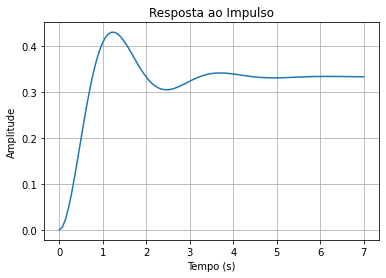

In [8]:
#resposta ao impulso - Malha fechada ganho k=1
t2,y2 =ctl.step(G)
#plot da resposta ao impulso - malha fechada
plt.plot(y2,t2)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Impulso")
plt.grid()
plt.show()

polos:  [-1.+2.54950976j -1.-2.54950976j]
zeros :  []


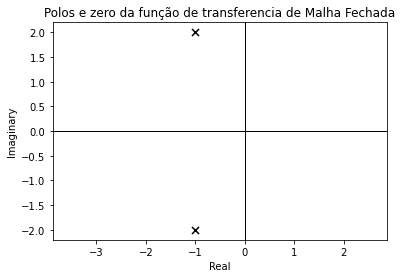

 polos do sistema | Ganho associado | frequencia natual para cada polo(wn) 
_____Eigenvalue______ Damping___ Frequency_
        -1     +2.55j     0.3651      2.739
        -1     -2.55j     0.3651      2.739


In [9]:
#polos da tf - malha fechada
print("polos: ",ctl.pole(G))
# Zeros da tf
print("zeros : ",ctl.zero(G))
polos_g =ctl.pole(G)
ctl.pzmap(G_s,title="Polos e zero da função de transferencia de Malha Fechada")
plt.show()

#wn (array) – frequencia natual para cada polo do sistema
#zeta (array) – Ganho associado a cada polo do sistema
#poles (array) – lista polos do sistema
print(" polos do sistema | Ganho associado | frequencia natual para cada polo(wn) ")
wn1 , zeta1, poles1 = ctl.damp(G, doprint=True)



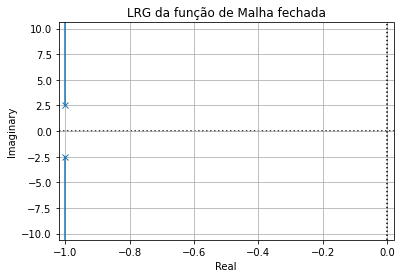

In [10]:
#Raizes da função de transferencia de malha fechada
klist1, rlist1 =ctl.rlocus(G,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função de Malha fechada")
plt.grid()
plt.show()


In [11]:
#parametros do sistema de malha fechada

wn = wn1[0];                                          #freq natural
zeta = 1/(2*wn);                                     # coef amortecimento
ts = 4/(zeta*wn)                                     # tempo de acomodação
Tp = np.pi/(wn*np.sqrt(1-zeta**2));                  # instante de pico
Up = (np.exp((-zeta*np.pi)/np.sqrt(1-zeta**2)))*100; #ultrapassagem percentual
print("wn = ", wn," zeta=", zeta)
print("Ts = ", ts,"s"," UP(%)=", Up)

wn =  2.738612787525831  zeta= 0.18257418583505533
Ts =  8.0 s  UP(%)= 55.80096012414848


<ipython-input-12-610a082da9e0>:4: RuntimeWarning: divide by zero encountered in log
  coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)
<ipython-input-12-610a082da9e0>:4: RuntimeWarning: invalid value encountered in true_divide
  coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)


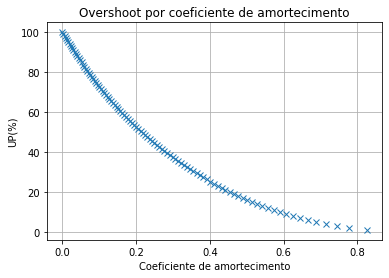

In [12]:
# plot sobressinal x coeficiente de amortecimento
#for i in range (0,100):
mp_porcent = np.linspace (0,100,100) #vetor de mp%
coef = -1 * np.log(mp_porcent/100)/np.sqrt(np.pi**2 + (np.log(mp_porcent/100))**2)
plt.plot(coef,mp_porcent,'x')
plt.title("Overshoot por coeficiente de amortecimento")
plt.xlabel("Coeficiente de amortecimento")
plt.ylabel("UP(%)")
plt.grid()
plt.show()


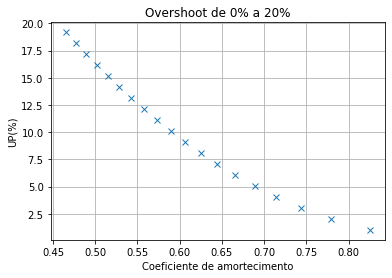

In [13]:
plt.plot(coef[0:20],mp_porcent[0:20],'x')
plt.title("Overshoot de 0% a 20%")
plt.xlabel("Coeficiente de amortecimento")
plt.ylabel("UP(%)")
plt.grid()
plt.show()

In [14]:
#--------------------parametros do sistema compensado------------
# P/ up(%)<=10% zeta =0.70 *** informação obtida no gráfico ***
#---------------------------------------------------------------
#novo wn
zeta = 0.70
margem_de_garantia = 0.5
wn = margem_de_garantia + (4 /zeta*1)
#ts (tempo de acomodação)
ts = 4/(zeta*wn)
print('Ts = ',ts,'s')
#Mp (sobressinal)
mp = 100 * np.exp((-1*zeta*np.pi)/np.sqrt(1-(zeta**2)))
print("UP = ",mp, "%")
# -------------** polos dominantes **--------------------------
#             s = -zeta*wn +-jsqrt(1-zeta^2)
#--------------------------------------------------------------

s =np.array([-zeta*wn + 1j* wn*np.sqrt(1-zeta**2), -zeta*wn - 1j*wn*np.sqrt(1-zeta**2)])
print("polos dominantes",s)

print("---------------------------------------------------")
print("Numerador do compensador = s+",-s.real[0])
print("---------------------------------------------------")

Ts =  0.9195402298850576 s
UP =  4.598791026026775 %
polos dominantes [-4.35+4.43788767j -4.35-4.43788767j]
---------------------------------------------------
Numerador do compensador = s+ 4.35
---------------------------------------------------


In [15]:
#--------- Calculo da posição do Polo do Compensador(s+p) -----------
n = np.size(s)
d_zero = -1* np.real(s-polos_g)
print(d_zero)

angulo = np.real(np.zeros_like(polos_g)) #definição de angulos em relação ao polos dominantes
for i in range(0,n): #for para prencher com os angulos em relação ao ponto
    angulo[i] = 180 - (np.arctan(np.imag((s[0]- polos_g[i]))/d_zero[i])*(180/np.pi))# 180/pi garante que os valores seja em radianos
print("lamb1 = ", angulo[0], "lamb2 = ",angulo[i])

#---------------angulo phi_compensador-------------------------------
#     fase s+p = fase(s+z)-fase(s+polo1)-fase(s+polo2)+180
#-------------------------------------------------------------------
ang_phi = 90-angulo[0]-angulo[1]+180
print("ângulo phi=",ang_phi)

#----definindo a distancia do polo do compensador em relação ao zero do compensador

position_z = np.real(-s[0])
phi_polo = np.deg2rad(ang_phi)#passando o angulos para radianos para calcular a tangente

d_parcial = position_z/np.tan(phi_polo)
print("A distancia entre o zero e o polo do compensador é : ",d_parcial)

D = d_parcial + position_z
print("A distancia do polo do compensador em relação a origem é :",D)

[3.35 3.35]
lamb1 =  150.59026578899378 lamb2 =  115.61467056325137
ângulo phi= 3.7950636477548585
A distancia entre o zero e o polo do compensador é :  65.57783191778032
A distancia do polo do compensador em relação a origem é : 69.92783191778031


In [16]:
#---------------------  Compensador sem kc ------------------
#                          s + z
#                        ---------   z>p
#                          s + p
#-----------------------------------------------------------

numcomp = np.array([1,-s.real[0]])
dencomp = np.array([1,D])
comp = ctl.tf(numcomp,dencomp)
print(comp)


s + 4.35
---------
s + 69.93



In [17]:
#----------------Definição do gain Kc para o compensador --------------
#----------------------------------------------------------------------
G_comp = G*comp # compensador sem o kc 
print(G_comp)



          2.5 s + 10.88
---------------------------------
s^3 + 71.93 s^2 + 147.4 s + 524.5



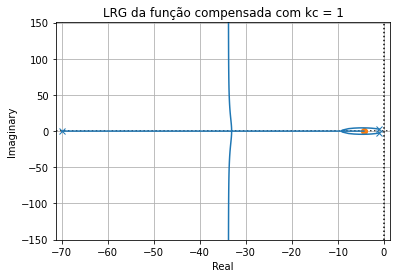

In [18]:
#Raizes da função de transferencia de malha fechada sem KC
klist1, rlist1 =ctl.rlocus(G_comp,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função compensada com kc = 1")
plt.grid()
plt.show()

In [19]:
#----------------- definição do ganho kc do compensador -----------------------
#              -condição em modulo para o sistema comensado é-
#
#              |       s+ z          2.5        |
#              | kc * ------ * ---------------- |  = 1
#              |       S+ p    s^2 + 2 s + 7.5  |
#------------------------------------------------------------------------------

#polos da tf compensada 
print("polos: ",ctl.pole(G_comp))
# Zeros da tf
print("zeros : ",ctl.zero(G_comp))
polos_comp = ctl.pole(G_comp) 
y =np.size(polos_comp) #quantidade de polos

H = np.real(np.array(np.zeros_like(polos_comp)))
             
#-------------- somatorio das hipotenusas ------------
for y in range(0,y):
    H[y]=np.sqrt(np.real(polos_comp[y]-s[0])**2 + np.imag(polos_comp[y]-s[0])**2)
print("----------------- hipotenusas ----------------")
print("h1 = ",H[0],"h2 = ",H[1],"h3 = ",H[2])

#----------------------------------------------------
C = np.imag(s[0])
print(C)
D = float(num)
print(D)
#--------------------KC---------------------------
#------------------------------------------------

kc = (H[0]*H[1]*H[2])/C*D

print("KC = " ,kc)

polos:  [-69.92783192+0.j          -1.        +2.54950976j
  -1.        -2.54950976j]
zeros :  [-4.35]
----------------- hipotenusas ----------------
h1 =  65.72782429059576 h2 =  3.8455781267755222 h3 =  7.748949783578202
4.437887666308771
2.5
KC =  1103.3605340302524


In [20]:

# -----------------------------------------------------------------------
#                          SISTEMA COMPENSADO
# ----------------------------------------------------------------------

G_comp = G*comp # compensador com compensador
sys_compensado = ctl.feedback(kc*G_comp,1)
print(sys_compensado)


          2758 s + 1.2e+04
------------------------------------
s^3 + 71.93 s^2 + 2906 s + 1.252e+04



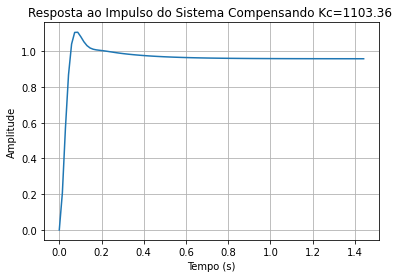

In [21]:
#resposta ao impulso - Sistema Compensando
t2,y2 =ctl.step(sys_compensado)
#plot da resposta ao Sistema Compensando
plt.plot(y2,t2)
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Impulso do Sistema Compensando Kc=1103.36 ")
plt.grid()
plt.show()

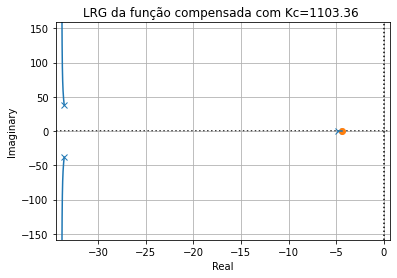

In [22]:
#Raizes da função de transferencia de malha fechada com kc = 1103.36
klist1, rlist1 =ctl.rlocus(sys_compensado,Plot=True,PrintGain=True,grid=False)
plt.title("LRG da função compensada com Kc=1103.36 ")
plt.grid()
plt.show()